In [12]:
import pandas as pd

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
df = pd.read_csv('/content/drive/MyDrive/ML project/main cpp.csv')

In [16]:
print(df.head())

                         State                  District      Crop     Year  \
0  Andaman and Nicobar Islands                  NICOBARS  Arecanut  2001-02   
1  Andaman and Nicobar Islands                  NICOBARS  Arecanut  2002-03   
2  Andaman and Nicobar Islands                  NICOBARS  Arecanut  2003-04   
3  Andaman and Nicobar Islands  NORTH AND MIDDLE ANDAMAN  Arecanut  2001-02   
4  Andaman and Nicobar Islands            SOUTH ANDAMANS  Arecanut  2002-03   

       Season    Area Area Units  Production Production Units     Yield  
0      Kharif  1254.0    Hectare      2061.0           Tonnes  1.643541  
1  Whole Year  1258.0    Hectare      2083.0           Tonnes  1.655803  
2  Whole Year  1261.0    Hectare      1525.0           Tonnes  1.209358  
3      Kharif  3100.0    Hectare      5239.0           Tonnes  1.690000  
4  Whole Year  3105.0    Hectare      5267.0           Tonnes  1.696296  


In [17]:
print(df.tail())

            State        District    Crop     Year      Season    Area  \
2550  West Bengal          MALDAH  Barley  1999-00        Rabi  2339.0   
2551  West Bengal          MALDAH  Barley  2000-01        Rabi  2199.0   
2552  West Bengal  MEDINIPUR WEST  Barley  1997-98  Whole Year     1.0   
2553  West Bengal     MURSHIDABAD  Barley  1997-98  Whole Year  1860.0   
2554  West Bengal     MURSHIDABAD  Barley  1998-99        Rabi  1661.0   

     Area Units  Production Production Units     Yield  
2550    Hectare         NaN           Tonnes       NaN  
2551    Hectare         NaN           Tonnes  0.536608  
2552    Hectare         NaN           Tonnes       NaN  
2553    Hectare         NaN           Tonnes  1.064516  
2554    Hectare      2340.0           Tonnes  1.408790  


In [18]:
df.columns

Index(['State', 'District', 'Crop', 'Year', 'Season', 'Area', 'Area Units',
       'Production', 'Production Units', 'Yield'],
      dtype='object')

In [19]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2555 entries, 0 to 2554
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             2555 non-null   object 
 1   District          2555 non-null   object 
 2   Crop              2555 non-null   object 
 3   Year              2555 non-null   object 
 4   Season            2555 non-null   object 
 5   Area              2543 non-null   float64
 6   Area Units        2555 non-null   object 
 7   Production        1953 non-null   float64
 8   Production Units  2555 non-null   object 
 9   Yield             2500 non-null   float64
dtypes: float64(3), object(7)
memory usage: 199.7+ KB
None


In [20]:
print(df.describe())

                Area    Production        Yield
count    2543.000000  1.953000e+03  2500.000000
mean     8870.250275  2.044291e+05    52.394949
std     27396.988192  2.846107e+06   523.497290
min         1.000000  0.000000e+00     0.000000
25%       121.000000  8.000000e+01     0.511628
50%       762.000000  5.900000e+02     0.894725
75%      4813.500000  5.100000e+03     1.745132
max    413835.100000  6.858000e+07  8372.163389


In [21]:
print(df.isnull().sum())

State                 0
District              0
Crop                  0
Year                  0
Season                0
Area                 12
Area Units            0
Production          602
Production Units      0
Yield                55
dtype: int64


In [36]:
df_cleaned = df.dropna(subset=['Area', 'Yield']).copy()
df_cleaned.loc[:, 'Production'].fillna(df_cleaned['Production'].mean(), inplace=True)
print(df_cleaned.isnull().sum())

State               0
District            0
Crop                0
Year                0
Season              0
Area                0
Area Units          0
Production          0
Production Units    0
Yield               0
dtype: int64


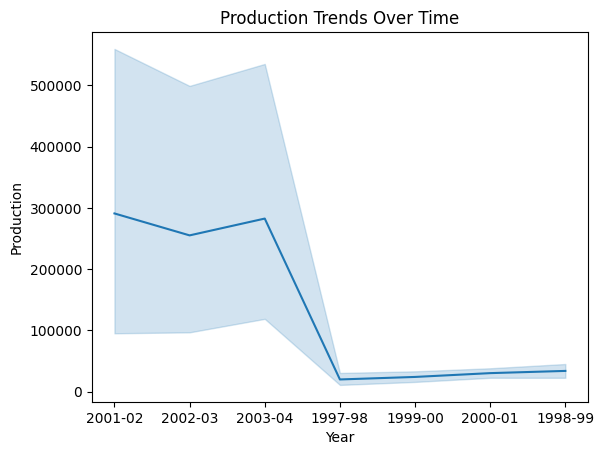

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x='Year', y='Production', data=df)
plt.title('Production Trends Over Time')
plt.show()

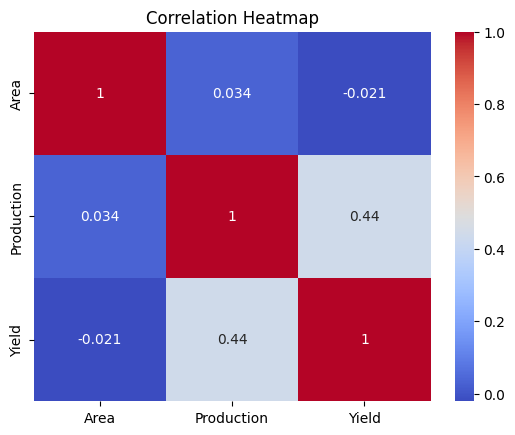

In [38]:
correlation_matrix = df[['Area', 'Production', 'Yield']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


 correlations between numerical variables.

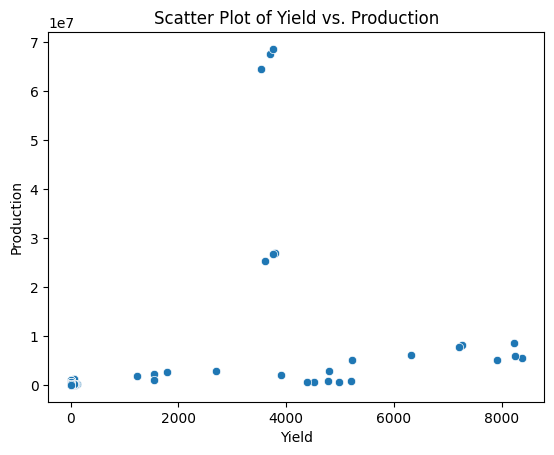

In [41]:
sns.scatterplot(x='Yield', y='Production', data=df)
plt.title('Scatter Plot of Yield vs. Production')
plt.show()

This can provide insights into the efficiency and effectiveness of crop production, which might impact crop prices.

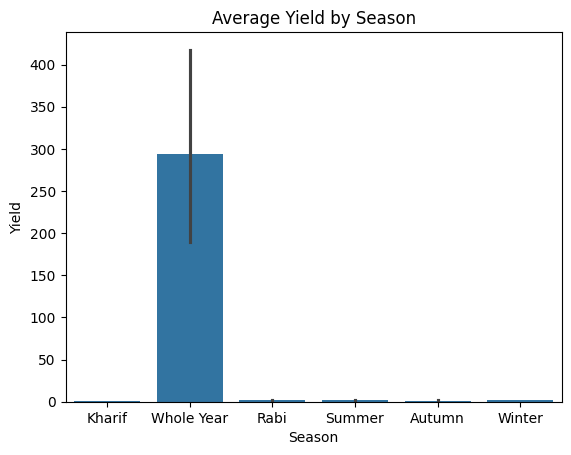

In [45]:
sns.barplot(x='Season', y='Yield', data=df)
plt.title('Average Yield by Season')
plt.show()

In [49]:
#label encoding
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['State', 'District', 'Crop', 'Season', 'Area Units', 'Production Units']

label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column+'_Encoded'] = label_encoder.fit_transform(df[column])

print(df.head())

                         State                  District      Crop     Year  \
0  Andaman and Nicobar Islands                  NICOBARS  Arecanut  2001-02   
1  Andaman and Nicobar Islands                  NICOBARS  Arecanut  2002-03   
2  Andaman and Nicobar Islands                  NICOBARS  Arecanut  2003-04   
3  Andaman and Nicobar Islands  NORTH AND MIDDLE ANDAMAN  Arecanut  2001-02   
4  Andaman and Nicobar Islands            SOUTH ANDAMANS  Arecanut  2002-03   

       Season    Area Area Units  Production Production Units     Yield  \
0      Kharif  1254.0    Hectare      2061.0           Tonnes  1.643541   
1  Whole Year  1258.0    Hectare      2083.0           Tonnes  1.655803   
2  Whole Year  1261.0    Hectare      1525.0           Tonnes  1.209358   
3      Kharif  3100.0    Hectare      5239.0           Tonnes  1.690000   
4  Whole Year  3105.0    Hectare      5267.0           Tonnes  1.696296   

   State_Encoded  District_Encoded  Crop_Encoded  Season_Encoded  \
0     

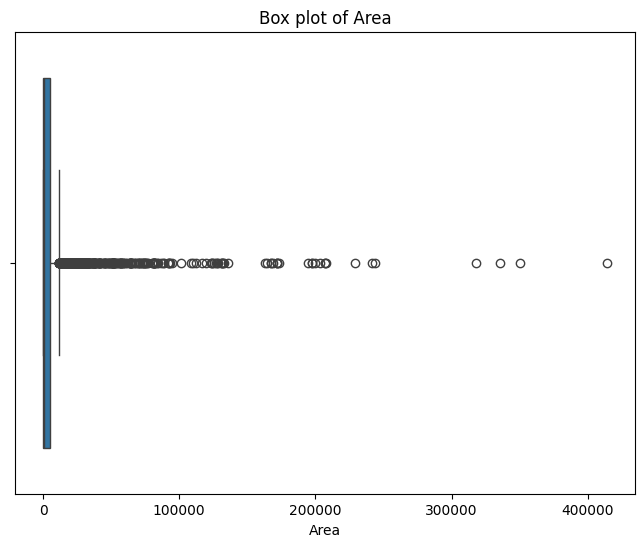

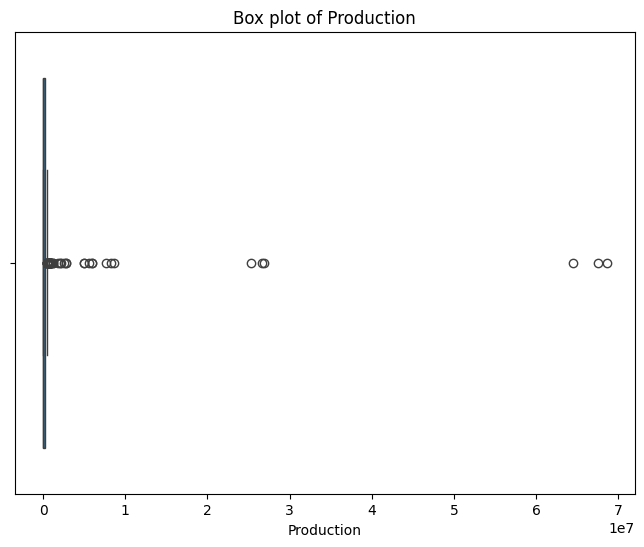

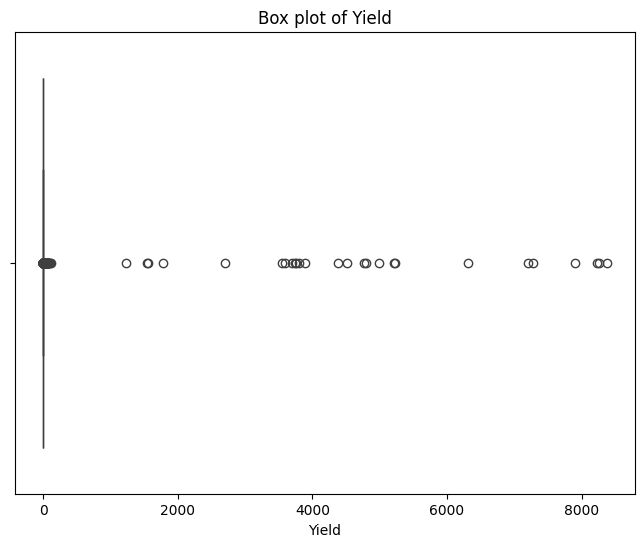

In [50]:
#outliers
# Assuming df is your DataFrame containing the data
numeric_columns = ['Area', 'Production', 'Yield']

# Create box plots for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title('Box plot of ' + column)
    plt.show()